In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
csv_data = "../ETL/miami_df_final.csv"
miami_df = pd.read_csv(csv_data)

In [3]:
cols = ["neighborhood", "br", "ba", "sqft", "housingType", "laundry", "parking", "cats", "dogs",\
       "furnished", "rent"]
miami_df = miami_df[cols].copy()
miami_df

,neighborhood,br,ba,sqft,housingType,laundry,parking,cats,dogs,furnished,rent
0,Dadeland,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1900
1,Doral,2,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,2557
2,Miami,2,2.0,1106.0,apartment,w/d in unit,off-street parking,yes,yes,no,2241
3,Doral,3,2.0,NaN,apartment,w/d in unit,attached garage,no,no,no,3399
4,Doral,1,1.0,NaN,apartment,w/d in unit,attached garage,no,no,no,1978
...,...,...,...,...,...,...,...,...,...,...,...
1831,Miami,1,1.0,NaN,apartment,w/d in unit,carport,no,no,no,1950
1832,Miami Beach,2,2.0,1300.0,apartment,w/d in unit,carport,no,no,no,2500
1833,Kendall,2,2.0,NaN,apartment,w/d in unit,carport,no,no,no,1500
1834,Fontainebleau,2,2.5,NaN,apartment,w/d in unit,carport,no,no,no,1700


In [4]:
miami_df.describe()

,br,ba,sqft,rent
count,1836.000000,1833.000000,616.000000,1836.000000
mean,1.735294,1.695035,1021.472403,2016.338235
std,0.774721,0.550915,413.481218,799.370174
min,0.000000,1.000000,235.000000,500.000000
25%,1.000000,1.000000,741.500000,1500.000000
50%,2.000000,2.000000,950.000000,1800.000000
75%,2.000000,2.000000,1250.000000,2250.000000
max,5.000000,4.500000,2921.000000,4950.000000


In [5]:
# replace NaN in miami_df['ba']
miami_df['ba'] = miami_df['ba'].apply(str)
miami_df.loc[miami_df['ba'].str.contains('nan'), 'ba'] = "0"
miami_df['ba'] = pd.to_numeric(miami_df['ba'])

In [6]:
# replace Nan values in miami_df['sqft']
miami_df['sqft'] = miami_df['sqft'].apply(str)
miami_df.loc[miami_df['sqft'].str.contains('nan'), 'sqft'] = "0"
miami_df['sqft'] = pd.to_numeric(miami_df['sqft'])
miami_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1836 entries, 0 to 1835
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   neighborhood  1836 non-null   object 
 1   br            1836 non-null   int64  
 2   ba            1836 non-null   float64
 3   sqft          1836 non-null   float64
 4   housingType   1836 non-null   object 
 5   laundry       1836 non-null   object 
 6   parking       1836 non-null   object 
 7   cats          1836 non-null   object 
 8   dogs          1836 non-null   object 
 9   furnished     1836 non-null   object 
 10  rent          1836 non-null   int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 157.9+ KB


In [7]:
miami_df.describe()

,br,ba,sqft,rent
count,1836.000000,1836.000000,1836.000000,1836.000000
mean,1.735294,1.692266,342.716231,2016.338235
std,0.774721,0.554707,538.560115,799.370174
min,0.000000,0.000000,0.000000,500.000000
25%,1.000000,1.000000,0.000000,1500.000000
50%,2.000000,2.000000,0.000000,1800.000000
75%,2.000000,2.000000,750.000000,2250.000000
max,5.000000,4.500000,2921.000000,4950.000000


## Data Preprocessing
Binary Encoded data, Scale or Normalize data

In [8]:
X = miami_df["neighborhood"].values
y = miami_df["rent"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1836, 1) (1836, 1)


In [9]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(X)
encoded_X = label_encoder.transform(X)

/Users/valerie/opt/anaconda3/envs/pythondata/lib/python3.6/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [10]:
for label, original_class in zip(encoded_X, X):
    print('Original Class: ' + str(original_class))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Class: ['Dadeland']
Encoded Label: 10
------------
Original Class: ['Doral']
Encoded Label: 12
------------
Original Class: ['Miami']
Encoded Label: 24
------------
Original Class: ['Doral']
Encoded Label: 12
------------
Original Class: ['Doral']
Encoded Label: 12
------------
Original Class: ['Doral']
Encoded Label: 12
------------
Original Class: ['Doral']
Encoded Label: 12
------------
Original Class: ['Doral']
Encoded Label: 12
------------
Original Class: ['Doral']
Encoded Label: 12
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Miami']
Encoded Label: 24
------------
Original Class: ['Dadeland']
Encoded Label: 10
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['North Miami']
Encoded Label: 33
------------
Original Class: ['Fontainebleau']
Encoded Label: 17
------------
Original Class: ['Coral Gables']
Encoded Label: 7
--------

Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Miami']
Encoded Label: 24
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Miami']
Encoded Label: 24
------------
Original Class: ['Dadeland']
Encoded Label: 10
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Fontainebleau']
Encoded Label: 17
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Dadeland']
Encoded Label: 10
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Miami Beac

------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Coral Gables']
Encoded Label: 7
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Hialeah']
Encoded Label: 18
------------
Original Class: ['Dadeland']
Encoded Label: 10
------------
Original Class: ['Dadeland']
Encoded Label: 10
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Fontainebleau']
Encoded Label: 17
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Fontainebleau']
Encoded Label: 17
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: [

------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Fontainebleau']
Encoded Label: 17
------------
Original Class: ['Downtown Miami']
Encoded Label: 13
------------
Original Class: ['South Miami']
Encoded Label: 41
------------
Original Class: ['Mimo / Upper East Side']
Encoded Label: 31
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Mimo / Upper East Side']
Encoded Label: 31
------------
Original Class: ['Deerwood']
Encoded Label: 11
------------
Original Class: ['Miami Beach']
Encoded Label: 25
------------
Original Class: ['Miami Beach']
Encode

Encoded Label: 20
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Palmetto Bay']
Encoded Label: 36
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Dadeland']
Encoded Label: 10
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Dadeland']
Encoded Label: 10
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Richmond West']
Encoded Label: 38
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Dadeland']
Encoded Label: 10
------------
Original Class: ['Kendall']
Encoded Label: 20
------------
Original Class: ['Dadeland']
Encoded Label: 10
------------
Original Class: ['Miami']
Encoded Label: 24
------------
Original Class: ['Coral Gables']
Encoded Label: 7
------------
Original Class: ['Fontainebleau']
Encoded Label: 17
------------
Or

In [11]:
from tensorflow.keras.utils import to_categorical

# Step 2: One-hot encoding
X = to_categorical(encoded_X)
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [12]:
# Split data into training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
# Scale or Normalize your data. Use StandardScaler if you don't know anything about your data.

from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

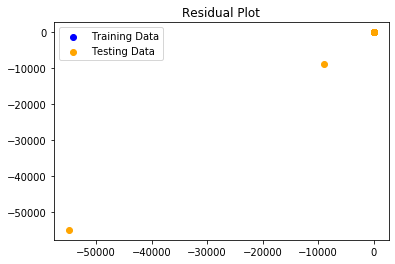

In [14]:
# Fit the Model to the scaled training data and make predictions using the scaled test data

# Plot the results 
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train_scaled)
plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
plt.title("Residual Plot")
plt.show()

In [15]:
# Quantify your model using the scaled data

from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test_scaled, predictions)
r2 = model.score(X_test_scaled, y_test_scaled)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 6726843.469306731, R2: -8062523.486519634


In [16]:
y_train_scaled

array([[-0.23010482],
       [-0.35274925],
       [-0.16878261],
       ...,
       [-0.41407147],
       [-0.47539368],
       [-0.29142704]])

In [17]:
y_scaler.inverse_transform(predictions)

array([[ 1.7430585e+03],
       [ 2.7304148e+03],
       [ 1.8250728e+03],
       [ 1.7430585e+03],
       [ 2.1115256e+03],
       [ 1.7016532e+03],
       [ 1.7542061e+03],
       [ 1.7016532e+03],
       [ 1.7016532e+03],
       [ 1.7542061e+03],
       [ 1.7016532e+03],
       [ 3.0128862e+03],
       [ 1.8250728e+03],
       [ 1.7542061e+03],
       [ 1.7542061e+03],
       [ 1.7430585e+03],
       [ 1.7430585e+03],
       [ 1.7430585e+03],
       [ 1.8250728e+03],
       [ 1.8250728e+03],
       [ 1.7016532e+03],
       [ 3.2113528e+03],
       [ 1.8250728e+03],
       [ 2.5892786e+03],
       [ 1.7016532e+03],
       [ 1.7016532e+03],
       [ 1.7016532e+03],
       [ 1.8250728e+03],
       [ 2.4795945e+03],
       [ 1.1440757e+03],
       [ 1.7430585e+03],
       [ 2.5892786e+03],
       [ 1.7016532e+03],
       [ 3.2113528e+03],
       [ 2.5892786e+03],
       [ 1.7016532e+03],
       [ 1.7016532e+03],
       [ 3.2113528e+03],
       [ 1.8981292e+03],
       [ 1.7430585e+03],
